In [ ]:
import sqlite3 # SQL library
import random # to randomly generate data
import pandas as pd  # to use tables
import matplotlib.pyplot as plt # to vistaulize datas in models

In [ ]:
# Creation of database tables
# date : 29/11/2023
# Luis Felipe Depardon Jasso (12235233)

# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()

# Creating the Artist table
cursor.execute('''
CREATE TABLE Artist (
    ArtistID INTEGER PRIMARY KEY,
    ArtistName TEXT NOT NULL,
    Role TEXT NOT NULL,
    DateOfBirth DATE NOT NULL,
    Country TEXT NOT NULL,
    Email TEXT NOT NULL,
    Phone TEXT NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL
)
''')

# Creating the Album table
cursor.execute('''
CREATE TABLE Album (
    AlbumID INTEGER PRIMARY KEY,
    AlbumTitle TEXT NOT NULL,
    ArtistID INTEGER NOT NULL,
    ReleaseDate DATE NOT NULL,
    Genre TEXT,
    TotalTracks INTEGER NOT NULL,
    Duration INTEGER NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL,
    FOREIGN KEY (ArtistID) REFERENCES Artist(ArtistID)
)
''')

# Creating the Song table
cursor.execute('''
CREATE TABLE Song (
    SongID INTEGER PRIMARY KEY,
    SongTitle TEXT NOT NULL,
    Duration INTEGER NOT NULL,
    ReleaseDate DATE NOT NULL,
    Genre TEXT,
    AlbumID INTEGER,
    ArtistID INTEGER NOT NULL,
    ProducerID INTEGER NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL,
    FOREIGN KEY (AlbumID) REFERENCES Album(AlbumID),
    FOREIGN KEY (ArtistID) REFERENCES Artist(ArtistID),
    FOREIGN KEY (ProducerID) REFERENCES Artist(Role)
)
''')

# Creating the Contract table
cursor.execute('''
CREATE TABLE Contract (
    ContractID INTEGER PRIMARY KEY,
    ArtistID INTEGER NOT NULL,
    ContractStartDate DATE NOT NULL,
    ContractEndDate DATE NOT NULL,
    Terms TEXT NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL,
    FOREIGN KEY (ArtistID) REFERENCES Artist(ArtistID)
)
''')

# Creating the Event table
cursor.execute('''
CREATE TABLE Event (
    EventID INTEGER PRIMARY KEY,
    ArtistID INTEGER NOT NULL,
    EventType TEXT NOT NULL,
    EventDate DATE NOT NULL,
    Location TEXT NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL,
    FOREIGN KEY (ArtistID) REFERENCES Artist(ArtistID)
)
''')

# Creating the Sale table
cursor.execute('''
CREATE TABLE Sale (
    SaleID INTEGER PRIMARY KEY,
    AlbumID INTEGER NOT NULL,
    SaleDate DATE NOT NULL,
    Revenue REAL NOT NULL,
    Platform TEXT NOT NULL,
    CreatedOn DATE NOT NULL,
    CreatedBy INTEGER NOT NULL,
    ChangedOn DATE NOT NULL,
    ChangedBy INTEGER NOT NULL,
    FOREIGN KEY (AlbumID) REFERENCES Album(AlbumID)
)
''')

# Commit changes and close the connection
conn.commit()
conn.close()


In [ ]:

# inserting fake datas into the database tables
# tables : Artist, Album, Song
# date : 29/11/2023
# Chaw Thiri San (12225272)



# Connect to SQLite database (creates a new database if it doesn't exist)
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()



# Insert 20 rows of data into the Artist table
for i in range(20):
    cursor.execute('''
    INSERT INTO Artist (ArtistID, ArtistName, Role, DateOfBirth, Country, Email, Phone, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        f"Artist{i}",
        f"Role{i}",
        f"2000-01-{i+1:02d}",
        f"Country{i}",
        f"email{i}@example.com",
        f"123-456-789{i}",
        f"2023-01-{i+1:02d}",
        random.randint(1, 100),
        f"2023-01-{i+1:02d}",
        random.randint(1, 100)
    ))
   #  {i+1:02d} ensures that the day will always have two digits

# Insert 20 rows of data into the Album table
for i in range(20):
    cursor.execute('''
    INSERT INTO Album (AlbumID, AlbumTitle, ArtistID, ReleaseDate, Genre, TotalTracks, Duration, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        f"Album{i}",
        random.randint(1, 20),
        f"2023-01-{i+1:02d}",
        f"Genre{i}",
        random.randint(5, 15),
        random.randint(120, 300),
        f"2023-01-{i+1:02d}",
        random.randint(1, 100),
        f"2023-01-{i+1:02d}",
        random.randint(1, 100)
    ))

# Insert 20 rows of data into the Song table
for i in range(20):
    cursor.execute('''
    INSERT INTO Song (SongID, SongTitle, Duration, ReleaseDate, Genre, AlbumID, ArtistID, ProducerID, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        f"Song{i}",
        random.randint(120, 300),
        f"2023-01-{i+1:02d}",
        f"Genre{i}",
        random.randint(1, 20),
        random.randint(1, 100),
        random.randint(1, 100),
        f"2023-01-{i+1:02d}",
        random.randint(1, 100),
        f"2023-01-{i+1:02d}",
        random.randint(1, 100)
    ))

    # i+1:02d : to make every number double digits


conn.commit()

# using pandas to print out the datas in table format to improve readibility
artist_df = pd.read_sql_query('SELECT * FROM Artist', conn)
print("\nData from Artist table:")
print(artist_df)


album_df = pd.read_sql_query('SELECT * FROM Album', conn)
print("\nData from Album table:")
print(album_df)

song_df = pd.read_sql_query('SELECT * FROM Song', conn)
print("\nData from Song table:")
print(song_df)

# Close the connection
conn.close()



Data from Artist table:
    ArtistID ArtistName    Role DateOfBirth    Country                Email  \
0          1    Artist0   Role0  2000-01-01   Country0   email0@example.com   
1          2    Artist1   Role1  2000-01-02   Country1   email1@example.com   
2          3    Artist2   Role2  2000-01-03   Country2   email2@example.com   
3          4    Artist3   Role3  2000-01-04   Country3   email3@example.com   
4          5    Artist4   Role4  2000-01-05   Country4   email4@example.com   
5          6    Artist5   Role5  2000-01-06   Country5   email5@example.com   
6          7    Artist6   Role6  2000-01-07   Country6   email6@example.com   
7          8    Artist7   Role7  2000-01-08   Country7   email7@example.com   
8          9    Artist8   Role8  2000-01-09   Country8   email8@example.com   
9         10    Artist9   Role9  2000-01-10   Country9   email9@example.com   
10        11   Artist10  Role10  2000-01-11  Country10  email10@example.com   
11        12   Artist11  Ro

In [ ]:
# inserting fake datas into the database tables
# tables : events, contracts, sales
# date : 29/11/2023
# THIRI MOE HTET (1221482)

import sqlite3
import random

conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()

# Get existing ArtistIDs from the Artist table
cursor.execute('SELECT ArtistID FROM Artist')
artist_ids = [row[0] for row in cursor.fetchall()]

# Insert 20 rows of data into the Event table
for i in range(20):
    cursor.execute('''
    INSERT INTO Event (EventID, ArtistID, EventType, EventDate, Location, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        random.choice(artist_ids),  # Randomly select an existing ArtistID
        f"EventType{i}",
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        f"Location{i}",
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100),
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100)
    ))

# Insert 20 rows of data into the Contract table
for i in range(20):
    cursor.execute('''
    INSERT INTO Contract (ContractID, ArtistID, ContractStartDate, ContractEndDate, Terms, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        random.choice(artist_ids),  # Randomly select an existing ArtistID
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        f"{random.randint(2000, 2024)}-12-{i+1:02d}",
        f"Terms{i}",
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100),
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100)
    ))

# Insert 20 rows of data into the Sale table
for i in range(20):
    cursor.execute('''
    INSERT INTO Sale (SaleID, AlbumID, SaleDate, Revenue, Platform, CreatedOn, CreatedBy, ChangedOn, ChangedBy)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        i + 1,
        random.randint(1, 20),  # Assuming AlbumID is present in the Album table
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.uniform(100, 1000000),
        f"Platform{i}",
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100),
        f"{random.randint(2000, 2024)}-01-{i+1:02d}",
        random.randint(1, 100)
    ))

# Commit changes
conn.commit()

# Print all data from the Event table
cursor.execute('SELECT * FROM Event')
print("\nData from Event table:")
for row in cursor.fetchall():
    print(row)

# Print all data from the Contract table
cursor.execute('SELECT * FROM Contract')
print("\nData from Contract table:")
for row in cursor.fetchall():
    print(row)

# Print all data from the Sale table
cursor.execute('SELECT * FROM Sale')
print("\nData from Sale table:")
for row in cursor.fetchall():
    print(row)

# Close the connection
conn.close()



Data from Event table:
(1, 16, 'EventType0', '2003-01-01', 'Location0', '2009-01-01', 39, '2003-01-01', 12)
(2, 13, 'EventType1', '2019-01-02', 'Location1', '2011-01-02', 73, '2009-01-02', 32)
(3, 12, 'EventType2', '2003-01-03', 'Location2', '2016-01-03', 17, '2022-01-03', 68)
(4, 5, 'EventType3', '2022-01-04', 'Location3', '2019-01-04', 90, '2015-01-04', 2)
(5, 13, 'EventType4', '2024-01-05', 'Location4', '2018-01-05', 55, '2016-01-05', 13)
(6, 10, 'EventType5', '2011-01-06', 'Location5', '2001-01-06', 62, '2007-01-06', 58)
(7, 7, 'EventType6', '2016-01-07', 'Location6', '2015-01-07', 67, '2003-01-07', 66)
(8, 17, 'EventType7', '2003-01-08', 'Location7', '2022-01-08', 13, '2023-01-08', 83)
(9, 5, 'EventType8', '2021-01-09', 'Location8', '2007-01-09', 81, '2017-01-09', 87)
(10, 14, 'EventType9', '2012-01-10', 'Location9', '2000-01-10', 62, '2002-01-10', 66)
(11, 16, 'EventType10', '2001-01-11', 'Location10', '2001-01-11', 92, '2016-01-11', 18)
(12, 7, 'EventType11', '2010-01-12', 'Loc

In [ ]:
# query to calculate total songs, total events, total contracts, total albums, average revenue per sale, max revenue per sale associated with each artist
# used JOIN operations, GROUP BY clause, HAVING clause, Subqueries, CTE, window function, and aggregate functions
# date : 12/01/2023
# THIRI MOE HTET (1221482)

# Import necessary libraries
import sqlite3
import pandas as pd

# Define a function to execute a SQL query and display the results using Pandas
def execute_sql_query():
    # Connect to the SQLite database named 'Music-Label.db'
    conn = sqlite3.connect('Music-Label.db')

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()

    # Define the SQL query using Common Table Expressions (CTE), complex joins, window functions,
    # and intermediate SQL operations (joins, group by, having, subqueries, aggregate functions)
    sql_query = '''
    -- Using Common Table Expressions (CTE) for readability and simplifying the query structure

    -- CTE: RankedSales - Window function to rank sales within each album based on revenue
    WITH RankedSales AS (
        SELECT
            SaleID,
            AlbumID,
            Revenue,
            ROW_NUMBER() OVER (PARTITION BY AlbumID ORDER BY Revenue DESC) AS SaleRank
        FROM
            Sale
    ),

    -- CTE: TopSales - Selecting only the top sale for each album
    TopSales AS (
        SELECT
            SaleID,
            AlbumID,
            Revenue
        FROM
            RankedSales
        WHERE
            SaleRank = 1
    )

    -- Main Query combining multiple tables and advanced SQL features
    SELECT
        A.ArtistID,
        A.ArtistName,
        COUNT(DISTINCT AL.AlbumID) AS TotalAlbums,
        COUNT(DISTINCT S.SongID) AS TotalSongs,
        COUNT(DISTINCT E.EventID) AS TotalEvents,
        COUNT(DISTINCT C.ContractID) AS TotalContracts,
        AVG(SL.Revenue) AS AvgRevenuePerSale,
        MAX(TS.Revenue) AS MaxRevenueFromSingleSale
    FROM
        Artist A
    LEFT JOIN
        Album AL ON A.ArtistID = AL.ArtistID
    LEFT JOIN
        Song S ON A.ArtistID = S.ArtistID
    LEFT JOIN
        Event E ON A.ArtistID = E.ArtistID
    LEFT JOIN
        Contract C ON A.ArtistID = C.ArtistID
    LEFT JOIN (
        -- Subquery to find the average revenue per sale
        SELECT
            AL.AlbumID,
            AVG(SL.Revenue) AS Revenue
        FROM
            Album AL
        LEFT JOIN
            Sale SL ON AL.AlbumID = SL.AlbumID
        GROUP BY
            AL.AlbumID
    ) SL ON AL.AlbumID = SL.AlbumID
    LEFT JOIN TopSales TS ON AL.AlbumID = TS.AlbumID
    GROUP BY
        A.ArtistID, A.ArtistName
    HAVING
        TotalAlbums > 0
    ORDER BY
        AvgRevenuePerSale DESC;
    '''

    # Execute the SQL query using the cursor
    cursor.execute(sql_query)

    # Fetch all results from the executed query into a Pandas DataFrame
    df = pd.read_sql_query(sql_query, conn)

    # Display the Pandas DataFrame
    print(df)

    # Close the connection to the database
    conn.close()

# Call the function to execute the SQL query and display the results
execute_sql_query()


    ArtistID ArtistName  TotalAlbums  TotalSongs  TotalEvents  TotalContracts  \
0         16   Artist15            1           0            2               3   
1         17   Artist16            1           1            1               1   
2          9    Artist8            1           0            2               2   
3         11   Artist10            2           1            0               0   
4         12   Artist11            2           0            2               0   
5          6    Artist5            2           0            0               0   
6         14   Artist13            1           0            1               0   
7          5    Artist4            2           0            2               1   
8          1    Artist0            2           0            0               2   
9          2    Artist1            1           0            0               1   
10         4    Artist3            1           0            1               1   
11         8    Artist7     

In [ ]:
# query to filter songs using Dynamic SQL, Indexes & Performance Tuning, and finally CASE statements
# date : 12/01/2023
# THIRI MOE HTET (1221482)

import sqlite3
import pandas as pd

def get_filtered_songs(artist_name=None, genre=None, min_duration=None):
    # Connect to the SQLite database named 'Music-Label.db'
    conn = sqlite3.connect('Music-Label.db')

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()

    # Construct the base SQL query with dynamic conditions using CASE statements
    sql_query = '''
    SELECT
        S.SongID,
        S.SongTitle,
        S.Duration,
        S.ReleaseDate,
        S.Genre,
        A.ArtistName
    FROM
        Song S
    LEFT JOIN
        Artist A ON S.ArtistID = A.ArtistID
    WHERE
        1 = 1
    '''

    # Add dynamic conditions based on user inputs using CASE statements
    if artist_name:
        sql_query += f" AND A.ArtistName = '{artist_name}'"

    if genre:
        sql_query += f" AND S.Genre = '{genre}'"

    if min_duration:
        sql_query += f" AND S.Duration >= {min_duration}"

    # Execute the SQL query using the cursor
    cursor.execute(sql_query)

    # Fetch all results from the executed query into a Pandas DataFrame
    df = pd.read_sql_query(sql_query, conn)

    # Display the Pandas DataFrame
    print(df)

    # Close the connection to the database
    conn.close()

# Call the function with different parameters to test its functionality
# Retrieve all songs
get_filtered_songs()

# Retrieve songs by a specific artist
get_filtered_songs(artist_name='Artist8')

# Retrieve songs of a specific genre
get_filtered_songs(genre='Genre1')

# Retrieve songs with a minimum duration of 200 seconds
get_filtered_songs(min_duration=200)


    SongID SongTitle  Duration ReleaseDate    Genre ArtistName
0        1     Song0       126  2023-01-01   Genre0       None
1        2     Song1       143  2023-01-02   Genre1       None
2        3     Song2       166  2023-01-03   Genre2       None
3        4     Song3       122  2023-01-04   Genre3    Artist2
4        5     Song4       164  2023-01-05   Genre4   Artist10
5        6     Song5       269  2023-01-06   Genre5       None
6        7     Song6       200  2023-01-07   Genre6       None
7        8     Song7       168  2023-01-08   Genre7       None
8        9     Song8       168  2023-01-09   Genre8       None
9       10     Song9       219  2023-01-10   Genre9       None
10      11    Song10       283  2023-01-11  Genre10       None
11      12    Song11       275  2023-01-12  Genre11       None
12      13    Song12       234  2023-01-13  Genre12   Artist16
13      14    Song13       250  2023-01-14  Genre13       None
14      15    Song14       273  2023-01-15  Genre14    

In [ ]:
# date : 12/01/2023
# Luis Felipe Depardon Jasso (12235233)

# Connect to the SQLite database named 'Music-Label.db'
conn = sqlite3.connect('Music-Label.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Query one: Classifying songs by duration.
cursor.execute('''
SELECT SongTitle,
       CASE
           WHEN Duration < 120 THEN 'Short'
           WHEN Duration >= 120 AND Duration <= 180 THEN 'Medium'
           ELSE 'Long'
       END AS DurationCategory
FROM Song;
''')
result_one = cursor.fetchall()
print("Query One Results:")
print(result_one)

# Query two: Total number of songs and average duration for each genre.
cursor.execute('''
SELECT Genre, COUNT(SongID) AS TotalSongs, AVG(Duration) AS AvgDuration
FROM Song
GROUP BY Genre;
''')
result_two = cursor.fetchall()
print("\nQuery Two Results:")
print(result_two)

# Query three: Genres with an average album duration greater than  120 seconds.
cursor.execute('''
SELECT Genre, AVG(Duration) AS AvgAlbumDuration
FROM Album
GROUP BY Genre
HAVING AvgAlbumDuration > 120;
''')
result_three = cursor.fetchall()
print("\nQuery Three Results:")
print(result_three)

# Query Four: rank genres based on the total revenue generated from album sales.
cursor.execute('''
SELECT Genre, SUM(Revenue) AS TotalRevenue,
       RANK() OVER (ORDER BY SUM(Revenue) DESC) AS GenreRank
FROM Album
JOIN Sale ON Album.AlbumID = Sale.AlbumID
GROUP BY Genre;
''')
result_four = cursor.fetchall()
print("\nQuery Four Results:")
print(result_four)

#Query Five: Retrieve the information about album artist and song filtered by country.
cursor.execute('''
SELECT Artist.ArtistName, Album.AlbumTitle, Song.SongTitle, Artist.Country
FROM Artist
JOIN Album ON Artist.ArtistID = Album.ArtistID
JOIN Song ON Album.AlbumID = Song.AlbumID
WHERE Artist.Country = 'Country0';
''')
result_five = cursor.fetchall()
print("\nQuery Five Results:")
print(result_five)

# Query Six: find albums released after a certain date.
cursor.execute('''
WITH RecentAlbums AS (
    SELECT AlbumTitle, ReleaseDate
    FROM Album
    WHERE ReleaseDate > '2022-01-01'
)
SELECT *
FROM RecentAlbums;
''')
result_six = cursor.fetchall()
print("\nQuery six Results:")
print(result_six)



# Commit changes and close the connection
conn.commit()
conn.close()

Query One Results:
[('Song0', 'Medium'), ('Song1', 'Medium'), ('Song2', 'Medium'), ('Song3', 'Medium'), ('Song4', 'Medium'), ('Song5', 'Long'), ('Song6', 'Long'), ('Song7', 'Medium'), ('Song8', 'Medium'), ('Song9', 'Long'), ('Song10', 'Long'), ('Song11', 'Long'), ('Song12', 'Long'), ('Song13', 'Long'), ('Song14', 'Long'), ('Song15', 'Long'), ('Song16', 'Medium'), ('Song17', 'Long'), ('Song18', 'Long'), ('Song19', 'Long')]

Query Two Results:
[('Genre0', 1, 126.0), ('Genre1', 1, 143.0), ('Genre10', 1, 283.0), ('Genre11', 1, 275.0), ('Genre12', 1, 234.0), ('Genre13', 1, 250.0), ('Genre14', 1, 273.0), ('Genre15', 1, 215.0), ('Genre16', 1, 146.0), ('Genre17', 1, 266.0), ('Genre18', 1, 288.0), ('Genre19', 1, 296.0), ('Genre2', 1, 166.0), ('Genre3', 1, 122.0), ('Genre4', 1, 164.0), ('Genre5', 1, 269.0), ('Genre6', 1, 200.0), ('Genre7', 1, 168.0), ('Genre8', 1, 168.0), ('Genre9', 1, 219.0)]

Query Three Results:
[('Genre0', 240.0), ('Genre1', 264.0), ('Genre10', 232.0), ('Genre11', 159.0), ('

In [ ]:
# Query to calculate contract ending in 2024, contract starting in 2024, least sold album per artist, rank the artists according to the sales of their albums, CTE (update another artist into the company), combine artist and contract
# date : 12/01/2023
# Vu Nguyen Bao Ngoc (12225193)

import sqlite3

# Connect to the database
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()

# 1. Contracts ending in 2020
cursor.execute('''
    SELECT * FROM Contract
    WHERE ContractEndDate BETWEEN '2020-01-01' AND '2020-12-31'
''')
contracts_ending_2020 = cursor.fetchall()
print("Contracts ending in 2020:")
print(contracts_ending_2020)

# 2. Contracts starting in 2024
cursor.execute('''
    SELECT * FROM Contract
    WHERE ContractStartDate BETWEEN '2024-01-01' AND '2024-12-31'
''')
contracts_starting_2024 = cursor.fetchall()
print("\nContracts starting in 2024:")
print(contracts_starting_2024)

# 3. Least sold album per artist
cursor.execute('''
    SELECT ArtistID, MIN(SaleCount) AS MinSales
    FROM (
        SELECT Album.ArtistID, Album.AlbumID, COUNT(Sale.AlbumID) AS SaleCount
        FROM Album
        LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
        GROUP BY Album.AlbumID
    ) AS AlbumSales
    GROUP BY ArtistID
''')
least_sold_albums = cursor.fetchall()
print("Least sold album per artist:")
print(least_sold_albums)

# 4. Rank the artists according to the sales of their albums
cursor.execute('''
    SELECT ArtistID, SUM(Revenue) AS TotalRevenue
    FROM Album
    JOIN Sale ON Album.AlbumID = Sale.AlbumID
    GROUP BY ArtistID
    ORDER BY TotalRevenue DESC
''')
artists_ranked_by_sales = cursor.fetchall()
print("Artists ranked by sales of their albums:")
print(artists_ranked_by_sales)

# 5. CTE (Common Table Expression) to update another artist into the company
update_data = ('New Name', 'New Role', 1)
query = '''
    UPDATE Artist
    SET ArtistName = ?, Role = ?
    WHERE ArtistID = ?
'''

cursor.execute(query, update_data)

# Fetch and display the updated data
cursor.execute('SELECT * FROM Artist WHERE ArtistID = ?', (1,))
updated_artist = cursor.fetchone()
print("Artist updated:")
print(updated_artist)


# 6. Combine artist and contract data
cursor.execute('''
    SELECT *,
           ROW_NUMBER() OVER (ORDER BY Artist.ArtistID) AS RowNum
    FROM Artist
    LEFT JOIN Contract ON Artist.ArtistID = Contract.ArtistID
''')
combined_data = cursor.fetchall()
print("Combined data from Artist and Contract tables with RowNum:")
for row in combined_data:
    print(row)



# Commit changes and close the connection
conn.commit()
conn.close()


Contracts ending in 2020:
[(6, 5, '2017-01-06', '2020-12-06', 'Terms5', '2019-01-06', 1, '2004-01-06', 6), (12, 17, '2003-01-12', '2020-12-12', 'Terms11', '2009-01-12', 58, '2007-01-12', 14), (16, 18, '2018-01-16', '2020-12-16', 'Terms15', '2014-01-16', 53, '2012-01-16', 44)]

Contracts starting in 2024:
[]
Least sold album per artist:
[(3, 0), (4, 2), (5, 0), (6, 1), (8, 1), (9, 0), (11, 1), (12, 2), (13, 0), (14, 0), (16, 1), (17, 0), (20, 0)]
Artists ranked by sales of their albums:
[(14, 2092952.9039900794), (12, 1121164.4259548692), (13, 917140.8729144237), (16, 870328.3818402716), (6, 635097.7362354171), (11, 564199.3547668541), (3, 460410.0791308426), (4, 439382.3631776528), (8, 390108.08548807574), (9, 114998.1707070185)]
Artist updated:
(1, 'New Name', 'New Role', '2000-01-01', 'Country0', 'email0@example.com', '123-456-7890', '2023-01-01', 59, '2023-01-01', 69)
Combined data from Artist and Contract tables with RowNum:
(1, 'New Name', 'New Role', '2000-01-01', 'Country0', 'em

# 3 intermediate SQL
Chaw Thiri San (12225272)


*   Total Revenue generated by each artist
*   The top 10 BEST SELLING ALBUMS
*   Artists having album with less than 3 songs



In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 3 intermediate SQL
# Chaw Thiri San (12225272)
# Date : 2/ 12/ 2023

# Connect to the database
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()


# 1. Total Revenue generated by each artist



# since we want all the artist, left join on the aritist tabel
# to use aggregate function sum, group by is used to combine all the revenue of each artists
cursor.execute('''
  SELECT Artist.ArtistID, Artist.ArtistName, SUM(Sale.Revenue) AS TotalRevenue
    FROM Artist LEFT JOIN Album ON Artist.ArtistID = Album.ArtistID
    LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
    GROUP BY Artist.ArtistID, Artist.ArtistName
    ORDER BY Artist.ArtistID;

''')

# Fetch the result set into a Pandas DataFrame
result_df = pd.DataFrame(cursor.fetchall(), columns=['ArtistID', 'ArtistName','TotalSaleRevenue'])

# Print the result DataFrame
print("Total Revenue Generated by each artist:")
print(result_df)
print("\n")


# 2. The top 10 BEST SELLING ALBUMS based on Sale Revenue:

cursor.execute('''
    SELECT
    Album.AlbumTitle AS AlbumTitle, Artist.ArtistName AS ArtistName,
    SUM(Sale.Revenue) AS TotalRevenue FROM Album
    JOIN Artist ON Album.ArtistID = Artist.ArtistID
    LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
    GROUP BY Album.AlbumID ORDER BY TotalRevenue DESC LIMIT 10;

''')

# Fetch the result set into a Pandas DataFrame
result_df = pd.DataFrame(cursor.fetchall(), columns=['AlbumTitle', 'ArtistName','SaleRevenue'])

# Print the result DataFrame
print(f"The top 10 BEST SELLING ALBUMS based on Sale Revenue:")
print(result_df)
print("\n")

# 3. Artists having album with less than 3 songs

cursor.execute('''
     SELECT ArtistName, AlbumTitle, COUNT(*) AS TotalSongs FROM Artist
      JOIN Album ON Artist.ArtistID = Album.ArtistID
      JOIN Song ON Album.AlbumID = Song.AlbumID
    WHERE Album.AlbumID IN (
        SELECT AlbumID FROM Song GROUP BY AlbumID HAVING COUNT(*) < 3)
    GROUP BY ArtistName, AlbumTitle
    ORDER BY ArtistName, AlbumTitle;
''')

# Fetch the result set into a Pandas DataFrame
result_df = pd.DataFrame(cursor.fetchall(), columns=['ArtistName','AlbumTitle', 'Total Songs'])

# Print the result DataFrame
print(f"Artists having album with less than songs")
print(result_df)
print("\n")


# Close the database connection
conn.close()


Total Revenue Generated by each artist:
    ArtistID ArtistName  TotalSaleRevenue
0          1   New Name               NaN
1          2    Artist1               NaN
2          3    Artist2      4.604101e+05
3          4    Artist3      4.393824e+05
4          5    Artist4               NaN
5          6    Artist5      6.350977e+05
6          7    Artist6               NaN
7          8    Artist7      3.901081e+05
8          9    Artist8      1.149982e+05
9         10    Artist9               NaN
10        11   Artist10      5.641994e+05
11        12   Artist11      1.121164e+06
12        13   Artist12      9.171409e+05
13        14   Artist13      2.092953e+06
14        15   Artist14               NaN
15        16   Artist15      8.703284e+05
16        17   Artist16               NaN
17        18   Artist17               NaN
18        19   Artist18               NaN
19        20   Artist19               NaN


The top 10 BEST SELLING ALBUMS based on Sale Revenue:
  AlbumTitle ArtistNam

# 3 Advanced SQL
* Percentage Contribution of Invidual Album in an Artist Total Profits
* Delete artists who contracts have expired before 2020
* Ranking the artist based on their income


Percentage Contribution of Individual Album in Artist9's Total Profits
Empty DataFrame
Columns: [AlbumTitle, AlbumRevenue, RevenuePercentage]
Index: []




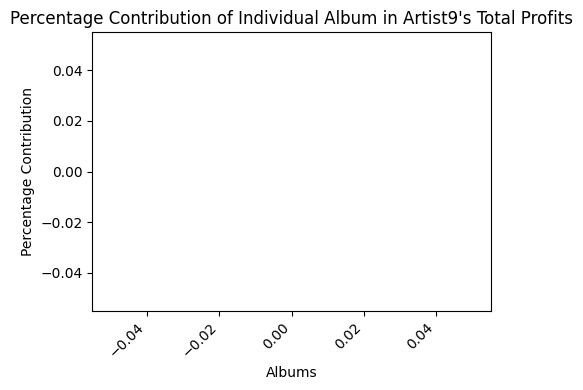

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()

# Specify the artist name
artist_name = 'Artist9'

# Execute the SQL query to get total revenue for the artist
cursor.execute('''
    SELECT SUM(Sale.Revenue) AS TotalRevenue FROM Album LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
    WHERE Album.ArtistID = (SELECT ArtistID FROM Artist WHERE ArtistName = ?)
''', (artist_name,))

# Fetch the total revenue
total_revenue_result = cursor.fetchone()
total_revenue = total_revenue_result[0] if total_revenue_result else 0

# Execute the SQL query to get individual album revenue and percentage
cursor.execute(f'''
    SELECT Album.AlbumTitle, SUM(Sale.Revenue) AS AlbumRevenue, 100 * SUM(Sale.Revenue) / ? AS RevenuePercentage
    FROM Album
    LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
    WHERE Album.ArtistID = (SELECT ArtistID FROM Artist WHERE ArtistName = ?)
    GROUP BY Album.AlbumID, Album.AlbumTitle
    ORDER BY Album.AlbumTitle;
''', (total_revenue, artist_name))

# Fetch the result set into a Pandas DataFrame
result_df = pd.DataFrame(cursor.fetchall(), columns=['AlbumTitle', 'AlbumRevenue', 'RevenuePercentage'])

# Close the database connection
conn.close()

# Print the result DataFrame
print(f"Percentage Contribution of Individual Album in {artist_name}'s Total Profits")
print(result_df)
print("\n")

# Create a bar chart using matplotlib
plt.figure(figsize=(5, 4))
plt.bar(result_df['AlbumTitle'], result_df['RevenuePercentage'], color='pink')
plt.xlabel('Albums')
plt.ylabel('Percentage Contribution')
plt.title(f"Percentage Contribution of Individual Album in {artist_name}'s Total Profits")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()


In [ ]:
# advanced SQL (2 & 3)
# Chaw Thiri San (12225272)
# Date : 2/12/2023
# Connect to the database

# Connect to the database
conn = sqlite3.connect('Music-Label.db')
cursor = conn.cursor()

try:
    # 2. Ranking artist based on their sale revenue
    cursor.execute('''
        WITH ArtistRevenue AS (
        SELECT Artist.ArtistID, ArtistName, COALESCE(SUM(Sale.Revenue), 0) AS TotalRevenue,
        ROW_NUMBER() OVER (ORDER BY COALESCE(SUM(Sale.Revenue), 0) DESC) AS RevenueRank FROM Artist
        LEFT JOIN Album ON Artist.ArtistID = Album.ArtistID
        LEFT JOIN Sale ON Album.AlbumID = Sale.AlbumID
        GROUP BY Artist.ArtistID, ArtistName
        )

        SELECT ArtistName, TotalRevenue,
        CASE
            WHEN TotalRevenue >= 100000 THEN 'Class A'
            WHEN TotalRevenue >= 50000 THEN 'Class B'
            ELSE 'Class C'
        END AS RevenueClass FROM
        ArtistRevenue ORDER BY     RevenueRank;

    ''')

    # Fetch the result set into a Pandas DataFrame
    result_df = pd.DataFrame(cursor.fetchall(), columns=['ArtistName', 'TotalRevenue', 'RevenueClass'])

    # Print the result DataFrame
    print(f"Ranking artist based on their sale revenue")
    print(result_df)
    print("\n")



    # 3. Deleting artists whose contract has expired before 2020
    # Count of artists before deletion
    cursor.execute('SELECT COUNT(*) FROM Artist')
    before_count = cursor.fetchone()[0]
    print("Deleting the data of artists whose contract has expired before 2020")
    print(f'Number of artists before deletion: {before_count}')

    # Removing artists whose contracts expired before 2020
    cursor.execute('''
        DELETE FROM Artist WHERE ArtistID IN (
            SELECT ArtistID FROM Contract WHERE ContractEndDate < ?
        );
    ''', ('2020-01-01',))

    # Count of artists after deletion
    cursor.execute('SELECT COUNT(*) FROM Artist')
    after_count = cursor.fetchone()[0]
    conn.commit()
    print(f'Number of artists after deletion: {after_count}\n')

except Exception as e:
    print(f"Error: {e}")
    conn.rollback()  # Roll back changes if an error occurs
finally:
    conn.close()


Ranking artist based on their sale revenue
   ArtistName  TotalRevenue RevenueClass
0    Artist13  2.092953e+06      Class A
1    Artist11  1.121164e+06      Class A
2    Artist12  9.171409e+05      Class A
3    Artist15  8.703284e+05      Class A
4     Artist5  6.350977e+05      Class A
5    Artist10  5.641994e+05      Class A
6     Artist2  4.604101e+05      Class A
7     Artist3  4.393824e+05      Class A
8     Artist7  3.901081e+05      Class A
9     Artist8  1.149982e+05      Class A
10   New Name  0.000000e+00      Class C
11    Artist1  0.000000e+00      Class C
12    Artist4  0.000000e+00      Class C
13    Artist6  0.000000e+00      Class C
14    Artist9  0.000000e+00      Class C
15   Artist14  0.000000e+00      Class C
16   Artist16  0.000000e+00      Class C
17   Artist17  0.000000e+00      Class C
18   Artist18  0.000000e+00      Class C
19   Artist19  0.000000e+00      Class C


Deleting the data of artists whose contract has expired before 2020
Number of artists before d